# Visualisasi Data Penjualan Game

### Pertanyaan 

- Genre apa yang paling banyak terjual?
- Platform mana yang paling populer dari sisi penjualan?
- Kawasan mana yang paling banyak konsumsi game?
- Apakah rating berpengaruh terhadap penjualan game?

## Persiapan

### Import library

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Siapkan Data

In [14]:
main_data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
main_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
main_data.info

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

       

In [18]:
main_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

### Data Cleaning

In [45]:
cleaned_data = main_data.dropna()
cleaned_data = cleaned_data.drop_duplicates()
cleaned_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [48]:
cleaned_data.columns = cleaned_data.columns.str.lower()
cleaned_data.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [49]:
cleaned_data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score          object
user_count         float64
developer           object
rating              object
dtype: object

In [50]:
cleaned_data["user_score"] = cleaned_data["user_score"].astype(float)
cleaned_data["year_of_release"] = cleaned_data["year_of_release"].astype(int)

In [51]:
cleaned_data.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Visualization

### Visualiasi Genre

In [ ]:
genre_data = cleaned_data["genre"].value_counts().sort_index()
genre = genre_data.index.tolist()
jumlah = genre_data.values.tolist()

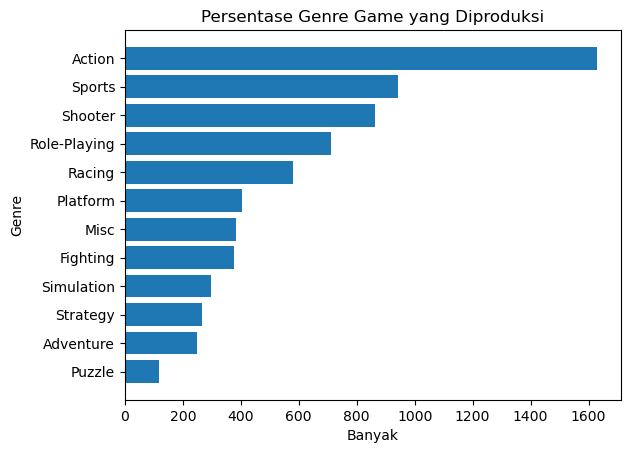

In [73]:
df_genre = pd.DataFrame({"genre": genre, "banyak": jumlah})

df_genre.sort_values(by="banyak", ascending=True, inplace=True)
df_genre

plt.barh(df_genre["genre"], df_genre["banyak"])

plt.title("Persentase Genre Game yang Diproduksi")
plt.ylabel("Genre")
plt.xlabel("Banyak")
plt.show()

### Visualisasi Platform

In [79]:
platform_data = cleaned_data["platform"].value_counts().sort_index()

platform = platform_data.index.tolist()
pl_jumlah = platform_data.values.tolist()

df_platform = pd.DataFrame({"platform" : platform, "banyak" : pl_jumlah})

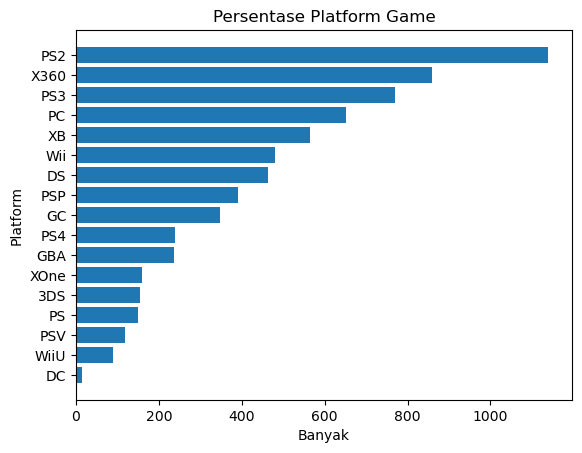

In [80]:
df_platform.sort_values(by="banyak", ascending=True, inplace=True)

plt.barh(df_platform["platform"], df_platform["banyak"])

plt.title("Persentase Platform Game")
plt.ylabel("Platform")
plt.xlabel("Banyak")
plt.show()

### Visualisasi Wilayah Penjualan

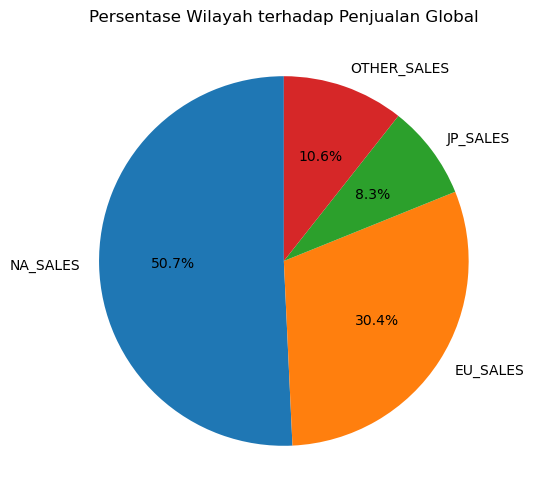

In [83]:
region_sales = cleaned_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index.str.upper(), autopct='%1.1f%%', startangle=90)
plt.title("Persentase Wilayah terhadap Penjualan Global")
plt.show()

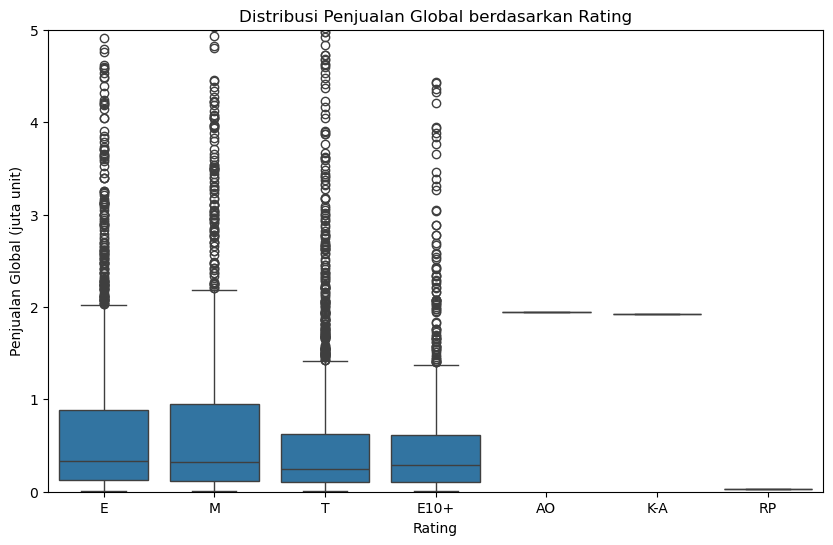

In [94]:
df_rating = cleaned_data.copy()

plt.figure(figsize=(10,6))
sns.boxplot(x="rating", y="global_sales", data=df_rating)
plt.ylim(0, 5)
plt.title("Distribusi Penjualan Global berdasarkan Rating")
plt.xlabel("Rating")
plt.ylabel("Penjualan Global (juta unit)")
plt.show()

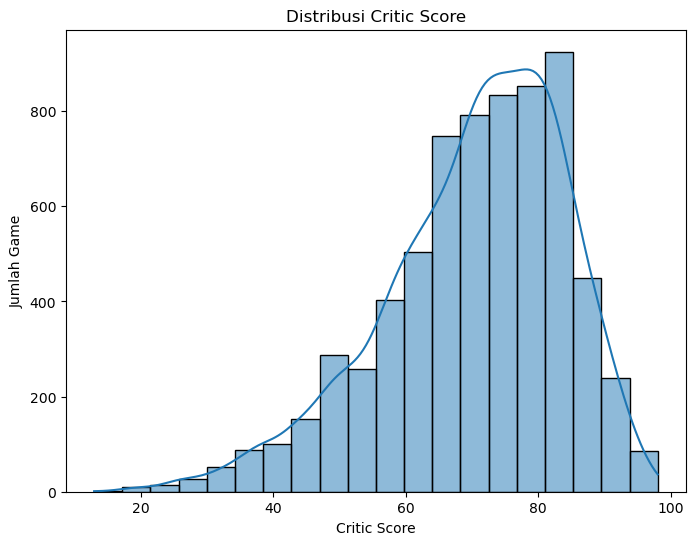

In [95]:
df_critic = cleaned_data.copy()

plt.figure(figsize=(8,6))
sns.histplot(df_critic["critic_score"], bins=20, kde=True)
plt.title("Distribusi Critic Score")
plt.xlabel("Critic Score")
plt.ylabel("Jumlah Game")
plt.show()

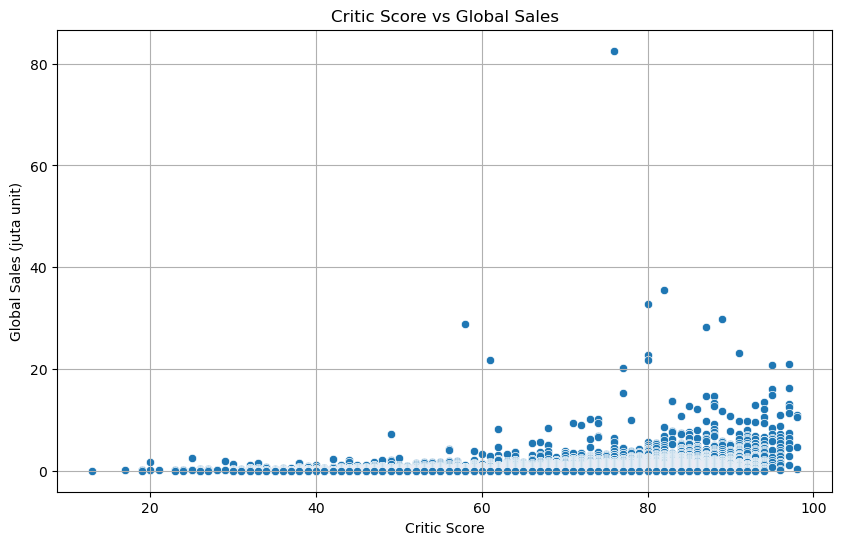

In [93]:
df_scatter = cleaned_data.copy()

plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='global_sales', data=df_scatter)
plt.title("Critic Score vs Global Sales")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (juta unit)")
plt.grid(True)
plt.show()